In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [2]:
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [3]:
print(dt.shape)

(45343, 115)


In [4]:
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [5]:
X = dt.drop(['price_in_USD'], axis = 1)
Y = dt.price_in_USD


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.2, random_state=10)

Best Alpha: 0.001
R^2 Score: 0.8676008637184099
MAE: 42297.95981342651
MSE: 5516695525.458917

Ridge Regression with best alpha: 0.001
R^2 Score: 0.8676008637184099
MAE: 42297.95981342651
MSE: 5516695525.458917


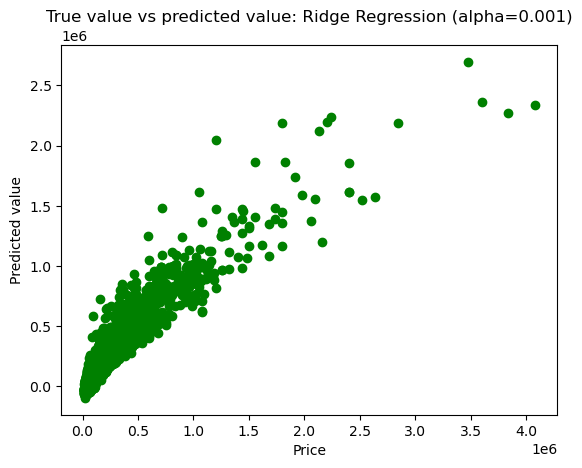

In [13]:
from sklearn.model_selection import KFold
# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Ridge Regression model
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 100)}
cv = KFold(n_splits=5, shuffle=True, random_state=10)  # Use KFold for regression

# Perform GridSearchCV with pre-fit for early stopping (indirect)
grid_search = GridSearchCV(ridge, param_grid, cv=cv, scoring='neg_mean_squared_error', refit=False)
grid_search.fit(X_train_scaled, Y_train)

# Get best parameters from grid search
best_params = grid_search.best_params_
best_alpha = grid_search.best_params_['alpha']

# Re-initialize Ridge with best parameters and fit on entire training set
ridge_best = Ridge(**best_params)
ridge_best.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
mse = mean_squared_error(Y_test, Y_pred_ridge)

# Print results
print("Best Alpha:", best_alpha)
print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

# Print the best alpha again
print(f"\nRidge Regression with best alpha: {best_alpha}")

# Evaluate performance on test set
print(f"R^2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Plot predicted vs actual values
plt.scatter(Y_test, Y_pred_ridge, c='green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title(f"True value vs predicted value: Ridge Regression (alpha={best_alpha})")
plt.show()

In [33]:
# from sklearn.linear_model import RidgeCV
# # Initialize variables
# n_alphas = 200
# alphas = 1 / np.logspace(1, -2, n_alphas)
# coefs = []
# # Initialize RidgeCV with a range of alphas
# ridge_cv = RidgeCV(alphas=alphas, cv=5)
# ridge_cv.fit(X_train, Y_train)

# # Get the best alpha
# best_alpha = ridge_cv.alpha_

# # Initialize Ridge Regression with the best alpha
# ridge_best = Ridge(alpha=best_alpha)
# ridge_best.fit(X_train, Y_train)

# # Get the coefficients and corresponding feature names
# feature_coefficients = pd.Series(ridge_best.coef_, index=X.columns)
# selected_features_ridge = feature_coefficients[abs(feature_coefficients) > 0.01].index.tolist()  # Adjust the threshold as needed

# # Print the selected features
# print("Selected Features by Ridge Regression:")
# for feature in selected_features_ridge:
#     print(feature)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a wider range of alpha values to search
alphas = np.logspace(-3, 3, 100)

# Create a Ridge Regression model
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Take negative of mean squared error because GridSearchCV uses neg_mean_squared_error

# Initialize Ridge Regression with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, Y_train)

# Predict on the test set
Y_pred_ridge = ridge_best.predict(X_test)

# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge) 
mse = mean_squared_error(Y_test, Y_pred_ridge)

# Print results
print("Best Alpha:", best_alpha)
print("Best MSE (Cross-Validation):", best_mse)
print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)


Best Alpha: 0.9326033468832199
Best MSE (Cross-Validation): 6356607095.664678
R^2 Score: 0.8683751568307873
MAE: 42330.91786345691
MSE: 5484432933.2063465


In [32]:
print(best_alpha)

0.8026433522257174


In [29]:
# ridge_best = Ridge(alpha=best_alpha)
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, Y_train)
Y_pred_ridge = ridge_best.predict(X_test)

In [30]:
# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
mse = mean_squared_error(Y_test, Y_pred_ridge)

# print(f"Ridge Regression with alpha={best_alpha}")
print(f"Ridge Regression with alpha={best_alpha}")
print(f"R^2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Ridge Regression with alpha=0.8026433522257174
R^2 Score: 0.8683103447602123
MAE: 42325.1349699358
MSE: 5487133467.890925


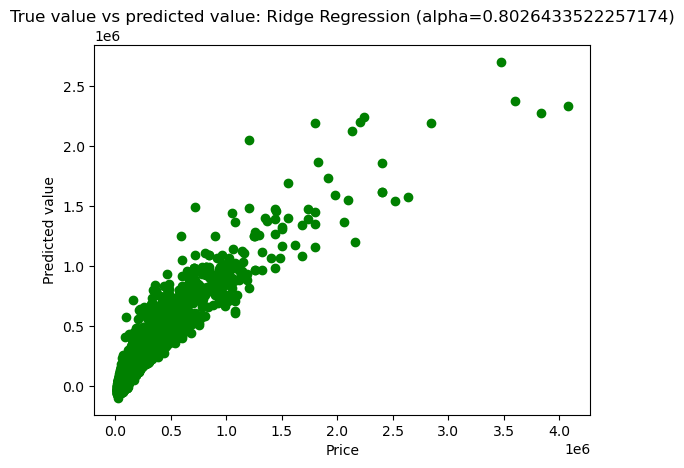

In [16]:
# Plotting predictions
plt.scatter(Y_test, Y_pred_ridge, c='green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title(f"True value vs predicted value: Ridge Regression (alpha={best_alpha})")
plt.show()